In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import pandas as pd

In [7]:
def var(X):
    return np.var(X) * len(X) / (len(X) - 1)

def std(X):
    return np.sqrt(var(X))

def regression(X, Y, display_plot=False):
    r = np.corrcoef(X, Y)[0, 1]
    Sx = std(X)
    Sy = std(Y)
    a = r * Sy / Sx
    b = np.mean(Y) - a * np.mean(X)

    if display_plot:
        plt.scatter(X, Y, alpha=0.5)
        xs = np.linspace(min(X), max(X), 1000)
        plt.plot(xs, a * xs + b, c='red', lw=2)
        plt.show()

    return [a, b]

def indeks_vectorized(lis, i):
    return list(map(lambda x: x[i], lis))

# Metoda z KASZCZU do wykrywania zmiany w wariancji

In [49]:
def RSP(X, Y):
    C = np.cumsum(Y**2)
    n = len(X)
    es = []
    for k in range(2, n-1):
        X1 = X[0:k]
        X2 = X[k:n+1]
        C1 = C[0:k]
        C2 = C[k:n+1]
        a1, b1 = regression(X1, C1, False)
        a2, b2 = regression(X2, C2, False)
        e = sum((C1 - a1 * X1 - b1)**2) + sum((C2 - a2 * X2 - b2)**2)
        es.append(e)
    return X[np.argmin(es) + 1]

4082

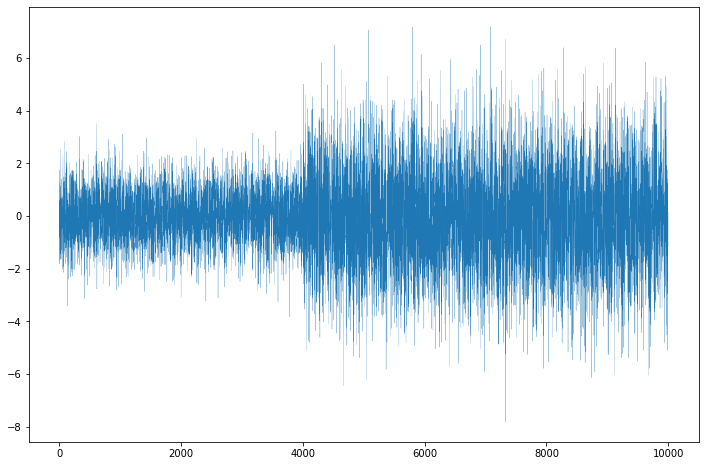

In [54]:
X = np.array(range(1, 10001))
Y1 = sp.norm.rvs(0, 1, 4000)
Y2 = sp.norm.rvs(0, 2, 6000)
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)

RSP(X, Y)

# Binary segmentation

In [3]:
def T_j(Y, j):
    n = len(Y)
    return (np.mean(Y[:j]) - np.mean(Y[j:]))**2 / (1/j + 1/(n - j))

In [5]:
def BS1(Y, return_Ts=False):
    n = len(Y)
    #Ts = np.vectorize(T_j, range(1, n))
    Ts = list(map(lambda j: T_j(Y, j), range(1, n)))
    T1 = max(Ts)
    j_ = np.argmax(Ts) + 1
    if return_Ts:
        return Ts
    else:
        return [j_, T1]


def BS(series, lam):
    js = []
    intervals = []
    intervals.append(series)
    first_indexes = []
    first_indexes.append(1)
    while len(intervals) > 0:
        Y = intervals[0]
        first_index = first_indexes[0]
        j_,  T1 = BS1(Y)
        if T1 > lam:
            js.append(first_index + j_)
            if len(Y[:j_]) > 1:
                intervals.append(Y[:j_])
                first_indexes.append(first_index)
            if len(Y[j_:]) > 1:
                intervals.append(Y[j_:])
                first_indexes.append(first_index + j_)
        intervals.pop(0)
        first_indexes.pop(0)
    return sorted(js)

In [7]:
def T_j(Y, j):
    n = len(Y)
    return (np.mean(Y[:j]) - np.mean(Y[j:]))**2 / (1/j + 1/(n - j))

T_j = np.vectorize(T_j)

Y1 = sp.norm.rvs(0, 1, 5000)
Y2 = sp.norm.rvs(1, 1, 5000)
Y = np.hstack((Y1, Y2))

T_j(Y, range(1, len(Y)))

TypeError: object of type 'numpy.float64' has no len()

In [6]:
import numpy as np
from multiprocessing import Pool
import numba as nb

# array whose square we need to find
array1 = np.linspace(0, 100, 100000000)

# function to find the square
def find_square(x):
    if x < 0:
        return 0
    else:
        return x ** 2

@nb.jit
def find_square_2(x):
    if x < 0:
        return 0
    else:
        return x ** 2

# vectorize() to vectorize the function find_square()
vectorized_function = np.vectorize(find_square)

vectorized_function_2 = np.frompyfunc(find_square, 1, 1)

vectorized_function_3 = np.frompyfunc(find_square_2, 1, 1)

<ipython-input-6-15601a724838>:16: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def find_square_2(x):


In [33]:
for x in array1:
    find_square(x)

In [8]:
for x in array1:
    find_square_2(x)

In [37]:
vectorized_function(array1)

array([0.00000000e+00, 1.00000002e-12, 4.00000008e-12, ...,
       9.99999960e+03, 9.99999980e+03, 1.00000000e+04])

In [40]:
vectorized_function_2(array1)

array([0.0, 1.0000000200000006e-12, 4.000000080000002e-12, ...,
       9999.999600000003, 9999.999800000001, 10000.0], dtype=object)

In [43]:
with Pool() as pool:
    wynik = pool.map(find_square, array1)
wynik

In [7]:
vectorized_function_3(array1)

array([0.0, 1.0000000200000006e-12, 4.000000080000002e-12, ...,
       9999.999600000003, 9999.999800000001, 10000.0], dtype=object)

In [3]:
def BS1(Y, return_Ts=False):
    n = len(Y)
    Ts = []
    for j in range(1, n):
        Tj = (np.mean(Y[:j]) - np.mean(Y[j:]))**2 / (1/j + 1/(n - j))
        Ts.append(Tj)
    T1 = max(Ts)
    j_ = np.argmax(Ts) + 1
    if return_Ts:
        return Ts
    else:
        return [j_, T1]


def BS(series, lam):
    js = []
    intervals = []
    intervals.append(series)
    first_indexes = []
    first_indexes.append(1)
    while len(intervals) > 0:
        Y = intervals[0]
        first_index = first_indexes[0]
        j_,  T1 = BS1(Y)
        if T1 > lam:
            js.append(first_index + j_)
            if len(Y[:j_]) > 1:
                intervals.append(Y[:j_])
                first_indexes.append(first_index)
            if len(Y[j_:]) > 1:
                intervals.append(Y[j_:])
                first_indexes.append(first_index + j_)
        intervals.pop(0)
        first_indexes.pop(0)
    return sorted(js)

In [10]:
import numpy as np

def BS1(Y, return_Ts=False):
    n = len(Y)
    cumsum = np.cumsum(Y)
    cumsum_rev = np.cumsum(Y[::-1])[::-1]
    idx = np.arange(1, n)
    
    Tj = (cumsum[:-1] / idx - cumsum_rev[:-1] / (n - idx))**2 / (1/idx + 1/(n - idx))
    
    T1 = np.max(Tj)
    j_ = np.argmax(Tj) + 1
    
    if return_Ts:
        return Tj.tolist()
    else:
        return [j_, T1]


In [5]:
sigma = 1
Y1 = sp.norm.rvs(0, sigma, 2000)
Y2 = sp.norm.rvs(1, sigma, 2000)
Y3 = sp.norm.rvs(0, sigma, 2000)
Y4 = sp.norm.rvs(1, sigma, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))
BS(Y, 30)

[1994, 4004, 6006]

In [34]:
[0, 1, 2, 3, 4, 5, 6][1::2]

[1, 3, 5]

In [20]:
Y[::-1]

array([ 1.87862644,  7.99678081,  0.49000852, ..., -1.21984893,
       -1.20103274, -3.5504874 ])

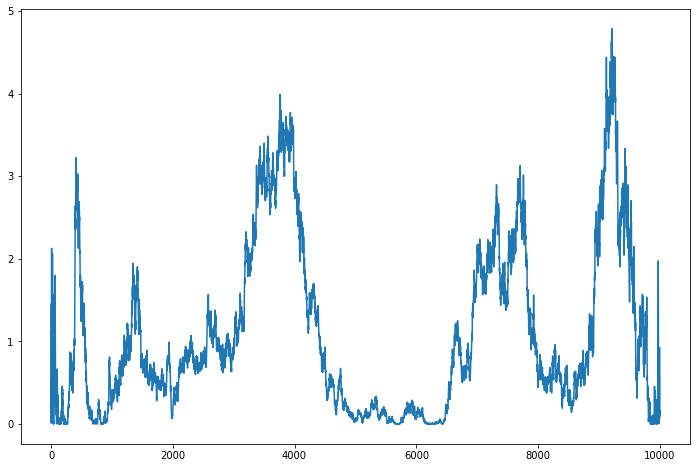

In [5]:
Y1 = sp.norm.rvs(0, 1, 5000)
Y2 = sp.norm.rvs(0, 1, 5000)
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
plt.plot(BS1(Y, True))

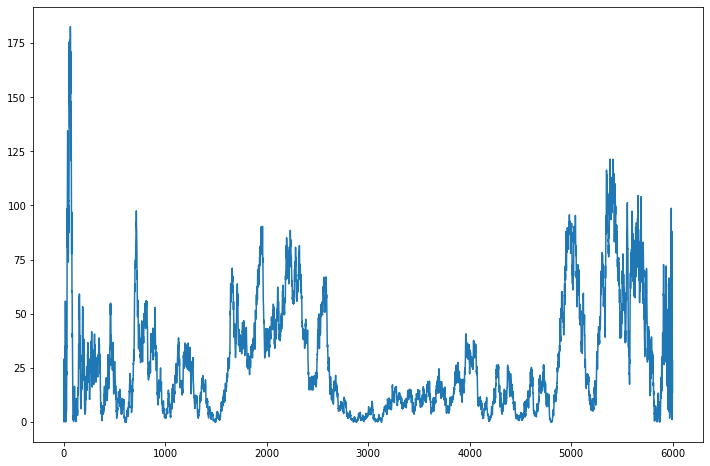

In [38]:
Y1 = sp.norm.rvs(0, np.sqrt(60), 3000)
Y2 = sp.norm.rvs(0, np.sqrt(60), 3000)
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
plt.plot(BS1(Y, True))

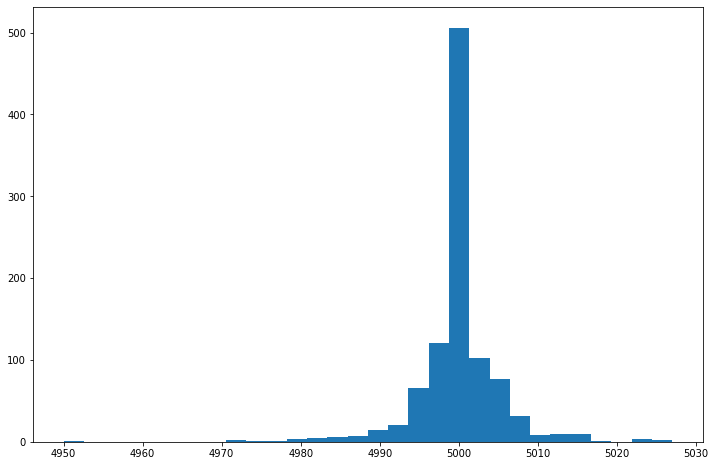

In [130]:
js = []
for i in range(1000):
    Y1 = sp.norm.rvs(0, 1, 5000)
    Y2 = sp.norm.rvs(1, 1, 5000)
    Y = np.hstack((Y1, Y2))
    js.append(BS1(Y)[0])

plt.figure(figsize=(12, 8))
plt.hist(js, bins=30)
plt.show()

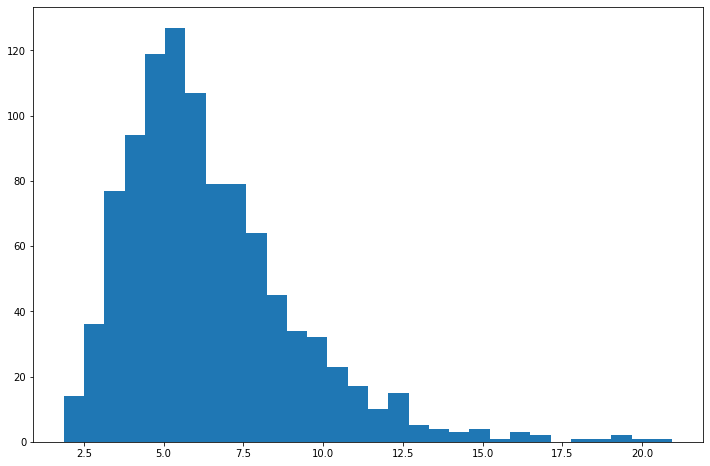

In [160]:
Ts = []
for i in range(1000):
    Y1 = sp.norm.rvs(0, 1, 500)
    Y2 = sp.norm.rvs(0, 1, 500)
    Y = np.hstack((Y1, Y2))
    Ts.append(BS1(Y)[1])

plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30)
plt.show()

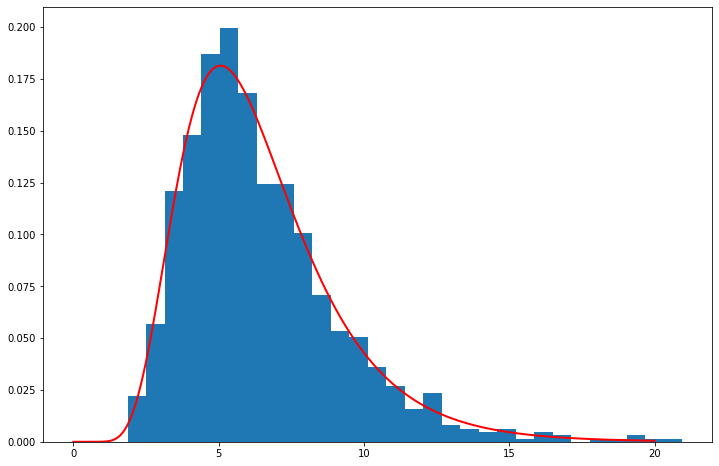

In [182]:
plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30, density=True)
xs = np.linspace(min(Ts), max(Ts), 1000)
mu = np.mean(np.log(Ts))
ys = sp.lognorm.pdf(xs, np.sqrt(np.mean((np.log(Ts) - mu)**2)), 0, np.exp(mu))
plt.plot(xs, ys, lw=2, c='r')
plt.show()

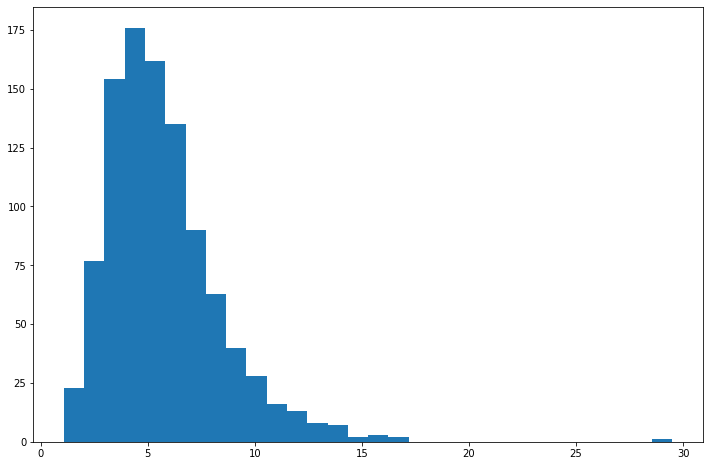

In [29]:
Ts = []
for i in range(1000):
    Y1 = sp.norm.rvs(0, 1, 500)
    Y2 = sp.norm.rvs(0, 1, 500)
    Y = np.hstack((Y1, Y2))
    Ts.append(BS1(Y)[1])

plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30)
plt.show()

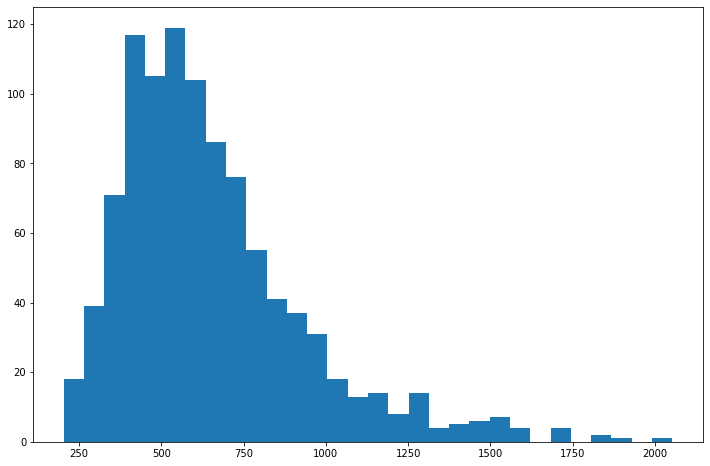

In [13]:
Ts = []
for i in range(1000):
    Y1 = sp.norm.rvs(0, 10, 5000)
    Y2 = sp.norm.rvs(0, 10, 5000)
    Y = np.hstack((Y1, Y2))
    Ts.append(BS1(Y)[1])

plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30)
plt.show()

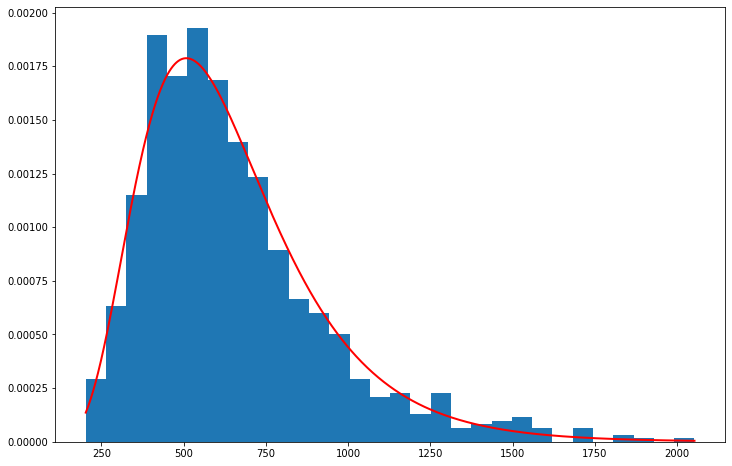

In [18]:
plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30, density=True)
xs = np.linspace(min(Ts), max(Ts), 1000)
mu = np.mean(np.log(Ts))
ys = sp.lognorm.pdf(xs, np.sqrt(np.mean((np.log(Ts) - mu)**2)), 0, np.exp(mu))
plt.plot(xs, ys, lw=2, c='r')
plt.show()

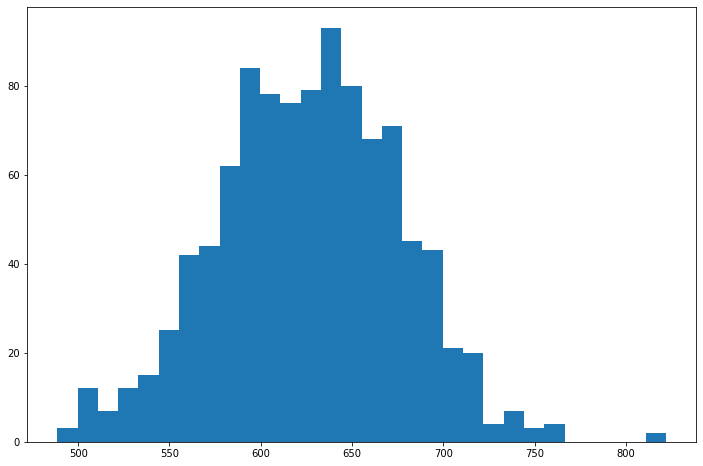

In [6]:
Ts = []
for i in range(1000):
    Y1 = sp.norm.rvs(0, 1, 5000)
    Y2 = sp.norm.rvs(0.5, 1, 5000)
    Y = np.hstack((Y1, Y2))
    Ts.append(BS1(Y)[1])

plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=30)
plt.show()

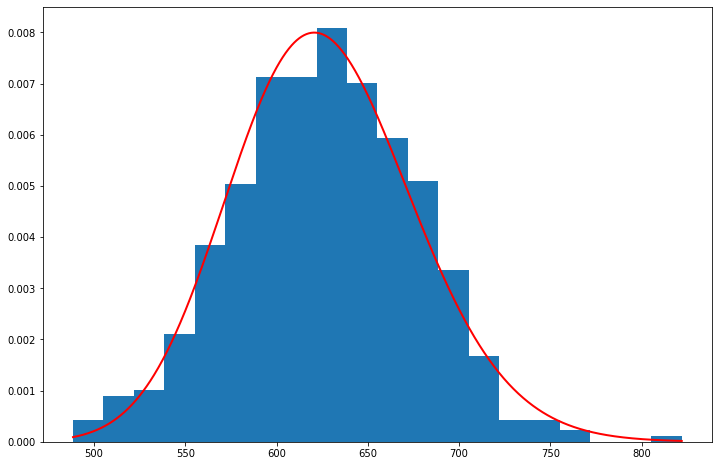

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(Ts, bins=20, density=True)
xs = np.linspace(min(Ts), max(Ts), 1000)
mu = np.mean(np.log(Ts))
ys = sp.lognorm.pdf(xs, np.sqrt(np.mean((np.log(Ts) - mu)**2)), 0, np.exp(mu))
plt.plot(xs, ys, lw=2, c='r')
plt.show()

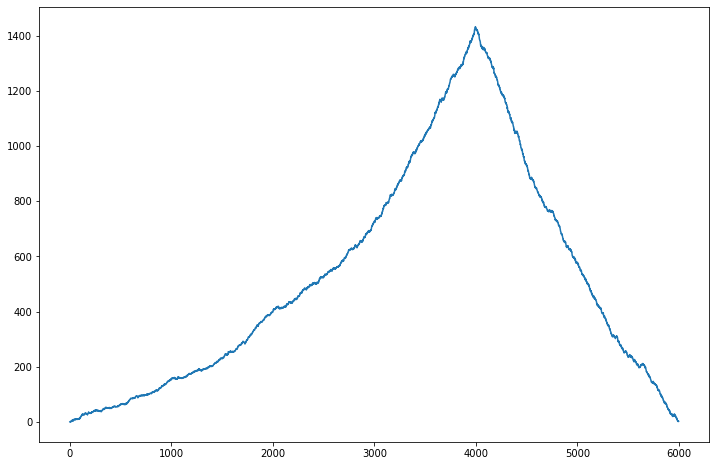

In [11]:
#Y1 = sp.norm.rvs(0, 1, 4000)
Y2 = sp.norm.rvs(1, 1, 4000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y = np.hstack((Y2, Y3))

plt.figure(figsize=(12,8))
#plt.hist(BS1(Y), bins=30)
plt.plot(BS1(Y, True))
plt.show()

In [12]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(1, 1, 2000)
Y3 = sp.norm.rvs(2, 1, 2000)
Y4 = sp.norm.rvs(3, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

In [17]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(1, 1, 2000)
Y3 = sp.norm.rvs(2, 1, 2000)
Y4 = sp.norm.rvs(3, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))
BS(Y, 15)

[2002, 3997, 6000]

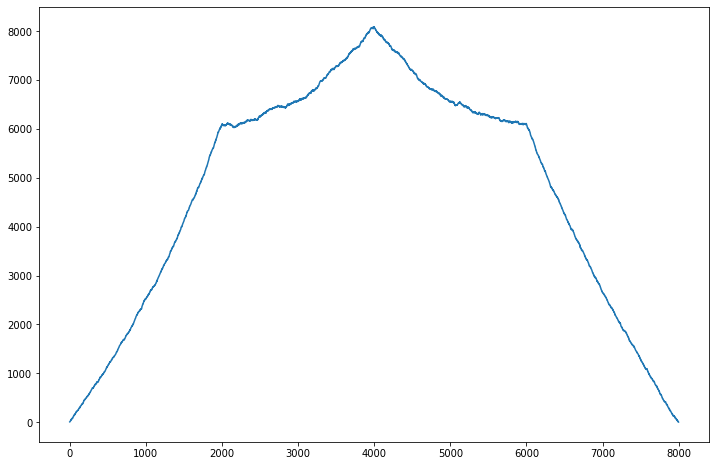

In [20]:
plt.figure(figsize=(12,8))
#plt.hist(BS1(Y), bins=30)
plt.plot(BS1(Y, True))
plt.show()

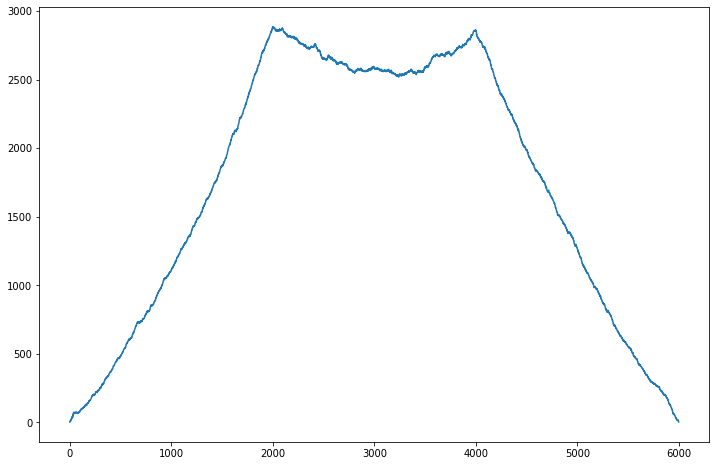

In [28]:
Y = np.hstack((Y1, Y2, Y3))

plt.figure(figsize=(12,8))
#plt.hist(BS1(Y), bins=30)
plt.plot(BS1(Y))

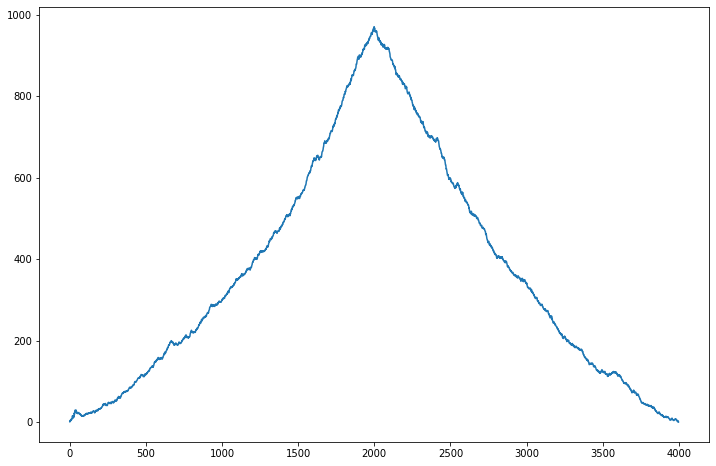

In [29]:
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
#plt.hist(BS1(Y), bins=30)
plt.plot(BS1(Y))

[4000, 9593.463607496407]

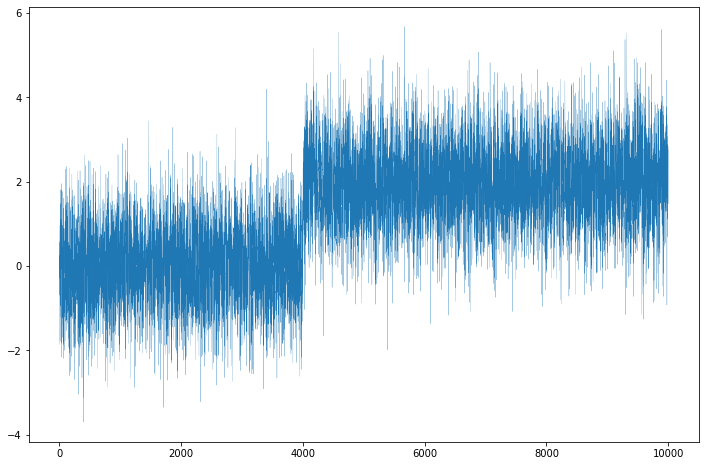

In [28]:
Y1 = sp.norm.rvs(0, 1, 4000)
Y2 = sp.norm.rvs(2, 1, 6000)
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)

BS1(Y)

# BWD

In [69]:
def DI(G1, G2):
    return abs(np.mean(G1) - np.mean(G2)) / np.sqrt(1/len(G1) + 1/len(G2))

def BWD(Y, lam):
    Gs = [ [Y[0]] ]
    DIs = []
    for j in range(len(Y) - 1):
        Gs.append([Y[j+1]])
        DIs.append(DI(Gs[j], Gs[j+1]))
    while min(DIs) < lam and len(Gs) > 2:
        n = len(Gs)
        j_min = np.argmin(DIs)

        G = Gs[j_min] + Gs[j_min + 1]
        Gs.pop(j_min + 1)
        Gs.pop(j_min)
        Gs.insert(j_min, G)

        if j_min < n - 2:
            DIs.pop(j_min + 1)
        DIs.pop(j_min)
        if j_min > 0:
            DIs.pop(j_min - 1)
        
        if j_min > 0:
            DI_left = DI(Gs[j_min - 1], Gs[j_min])
            DIs.insert(j_min - 1, DI_left)
        
        if j_min < n - 2:
            DI_right = DI(Gs[j_min], Gs[j_min + 1])
            DIs.insert(j_min, DI_right)
    
    return np.vectorize(len)(np.array(Gs))

In [73]:
Y1 = sp.norm.rvs(0, 1, 500)
Y2 = sp.norm.rvs(1, 1, 500)
Y = np.hstack((Y1, Y2))
BWD(Y, 5)

<ipython-input-69-becb2ea8888c>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.vectorize(len)(np.array(Gs))


array([508, 492])

In [77]:
Y1 = sp.norm.rvs(0, 1, 200)
Y2 = sp.norm.rvs(1, 1, 200)
Y3 = sp.norm.rvs(2, 1, 200)
Y4 = sp.norm.rvs(3, 1, 200)
Y = np.hstack((Y1, Y2, Y3, Y4))
BWD(Y, 5)

<ipython-input-69-becb2ea8888c>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.vectorize(len)(np.array(Gs))


array([200, 198, 204, 198])

# SaRa

In [39]:
def SaRa(Y, h, lam):
    n = len(Y)
    js = []
    S1 = pd.Series(Y).rolling(h).sum().dropna()[:-h].reset_index(drop=True)
    S2 = pd.Series(Y).rolling(h).sum().dropna()[h:].reset_index(drop=True)
    Ds = abs((S1 - S2) / h)
    Ds = np.hstack((np.zeros(h), Ds, np.zeros(h)))
    for j in range(h, len(Ds) - h):
        if sum(Ds[j] <= Ds[j-h:j+h]) == 1 and Ds[j] > lam:
            js.append(j)
    print(js)
    return Ds

In [41]:
def SaRa(Y, h, lam):
    n = len(Y)
    js = []
    S1 = pd.Series(Y).rolling(h).sum().dropna()[:-h].reset_index(drop=True)
    S2 = pd.Series(Y).rolling(h).sum().dropna()[h:].reset_index(drop=True)
    Ds = abs((S1 - S2) / h)
    Ds = np.hstack((np.zeros(h), Ds, np.zeros(h)))
    return [S1, S2]

[327, 500]


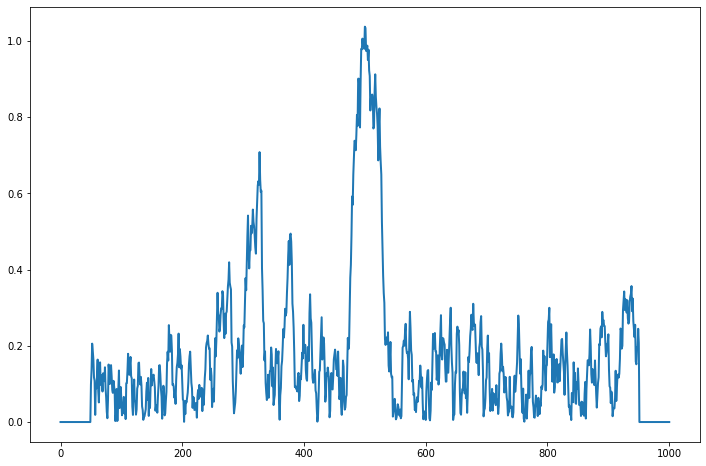

In [17]:
Y1 = sp.norm.rvs(0, 1, 500)
Y2 = sp.norm.rvs(1, 1, 500)
Y = np.hstack((Y1, Y2))

plt.figure(figsize=(12,8))
plt.plot(SaRa(Y, 50, 0.5), lw=2)

In [42]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(1, 1, 2000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y4 = sp.norm.rvs(1, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

SaRa(Y, 100, 0.6)
#plt.figure(figsize=(12,8))
#plt.plot(SaRa(Y, 100, 0.6), lw=2)

[0       -1.518938
 1       -1.743434
 2       -0.710159
 3       -0.118990
 4       -0.057340
           ...    
 7796    89.663745
 7797    88.509722
 7798    87.714641
 7799    87.277439
 7800    87.886010
 Length: 7801, dtype: float64,
 0         5.534578
 1         5.448179
 2         6.960814
 3         5.010306
 4         5.696543
            ...    
 7796     97.671394
 7797     98.237021
 7798     98.655351
 7799    100.024910
 7800     98.623078
 Length: 7801, dtype: float64]

# Bootstrap

In [ ]:
def bootstrap(Y, alpha):
    for i in range(len(Y)/100):
        Yi= np.random.shuffle(Y)
        Ts = list(map(lambda j: T_j(Yi, j), range(1, n)))
        T1 = max(Ts)

In [ ]:
def T_j(Y, j):
    n = len(Y)
    return (np.mean(Y[:j]) - np.mean(Y[j:]))**2 / (1/j + 1/(n - j))

In [ ]:
def BS1(Y, return_Ts=False):
    n = len(Y)
    #Ts = np.vectorize(T_j, range(1, n))
    Ts = list(map(lambda j: T_j(Y, j), range(1, n)))
    T1 = max(Ts)
    j_ = np.argmax(Ts) + 1
    if return_Ts:
        return Ts
    else:
        return [j_, T1]


def BS(series, lam):
    js = []
    intervals = []
    intervals.append(series)
    first_indexes = []
    first_indexes.append(1)
    while len(intervals) > 0:
        Y = intervals[0]
        first_index = first_indexes[0]
        j_,  T1 = BS1(Y)
        if T1 > lam:
            js.append(first_index + j_)
            if len(Y[:j_]) > 1:
                intervals.append(Y[:j_])
                first_indexes.append(first_index)
            if len(Y[j_:]) > 1:
                intervals.append(Y[j_:])
                first_indexes.append(first_index + j_)
        intervals.pop(0)
        first_indexes.pop(0)
    return sorted(js)

# Do prezki

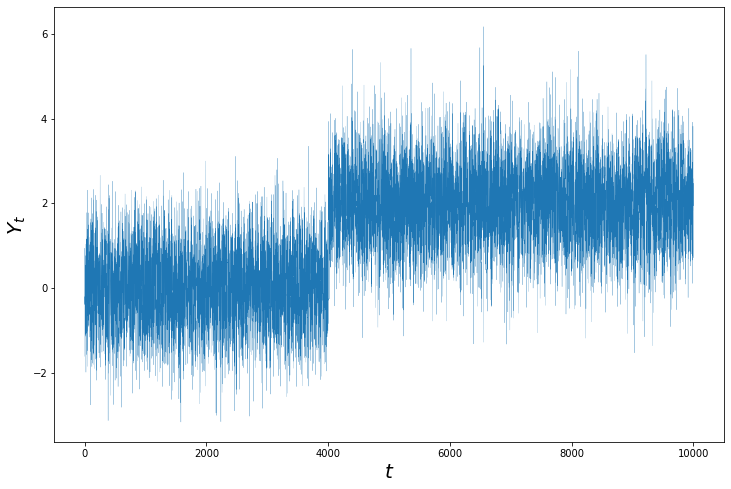

In [13]:
Y1 = sp.norm.rvs(0, 1, 4000)
Y2 = sp.norm.rvs(2, 1, 6000)
Y = np.hstack((Y1, Y2))

fig = plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$Y_t$', fontsize=20)
plt.show()
fig.savefig('figures/p2_1.jpg', dpi=200)

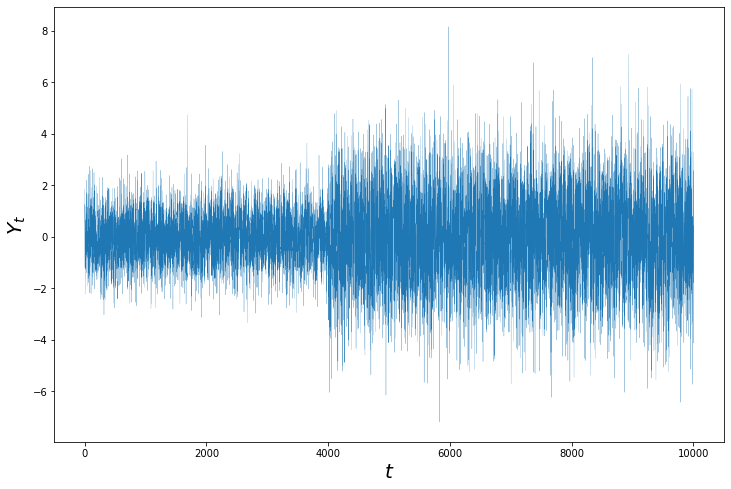

In [11]:
Y1 = sp.norm.rvs(0, 1, 4000)
Y2 = sp.norm.rvs(0, 2, 6000)
Y = np.hstack((Y1, Y2))

fig = plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$Y_t$', fontsize=20)
plt.show()
fig.savefig('figures/p2_2.jpg', dpi=200)

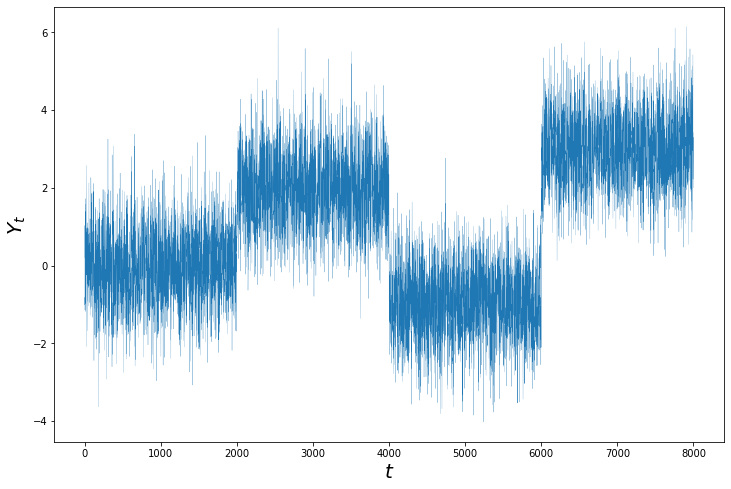

In [15]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(2, 1, 2000)
Y3 = sp.norm.rvs(-1, 1, 2000)
Y4 = sp.norm.rvs(3, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

fig = plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$t$', fontsize=20)
plt.ylabel('$Y_t$', fontsize=20)
plt.show()
fig.savefig('figures/p3_1.jpg', dpi=200)

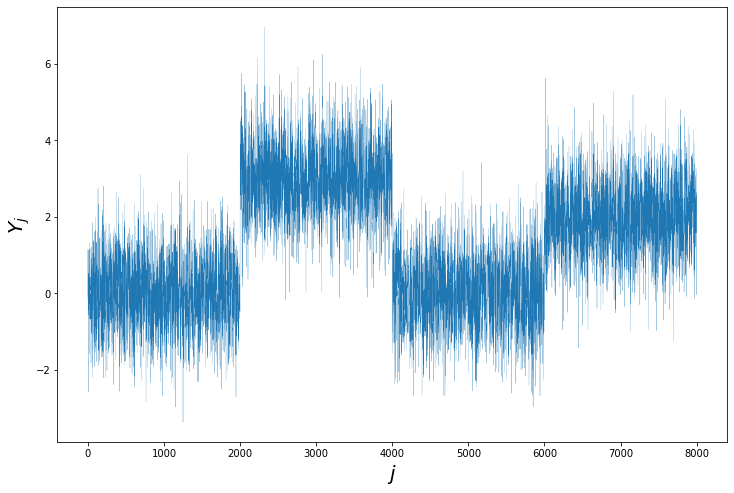

In [86]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(3, 1, 2000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y4 = sp.norm.rvs(2, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

fig = plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$j$', fontsize=20)
plt.ylabel('$Y_j$', fontsize=20)
plt.show()
fig.savefig('figures/p4-1_1.jpg', dpi=200)

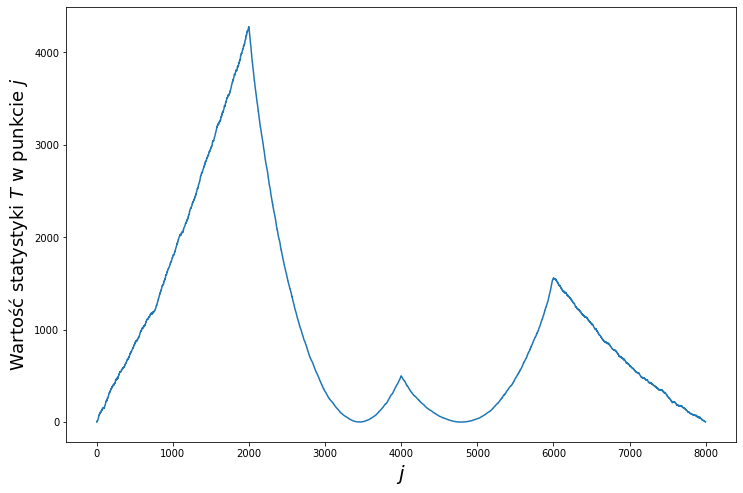

In [45]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(3, 1, 2000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y4 = sp.norm.rvs(2, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

fig = plt.figure(figsize=(12,8))
plt.plot(BS1(Y, True))
plt.xlabel('$j$', fontsize=20)
plt.ylabel('Wartość statystyki $T$ w punkcie $j$', fontsize=18)
plt.show()
fig.savefig('figures/p4-1_2.jpg', dpi=200)

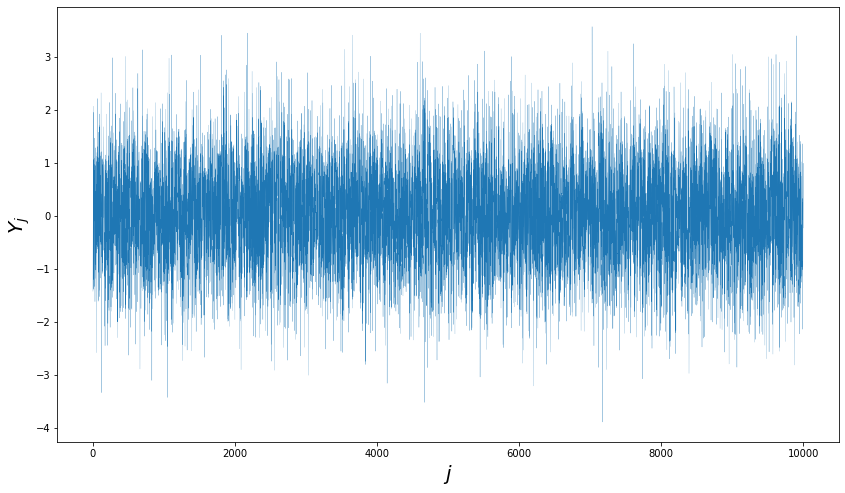

In [103]:
Y1 = sp.norm.rvs(0, 1, 5000)
Y2 = sp.norm.rvs(0, 1, 5000)
Y = np.hstack((Y1, Y2))

fig = plt.figure(figsize=(14,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$j$', fontsize=20)
plt.ylabel('$Y_j$', fontsize=20)
plt.show()
fig.savefig('figures/p4-1_3.jpg', dpi=200)

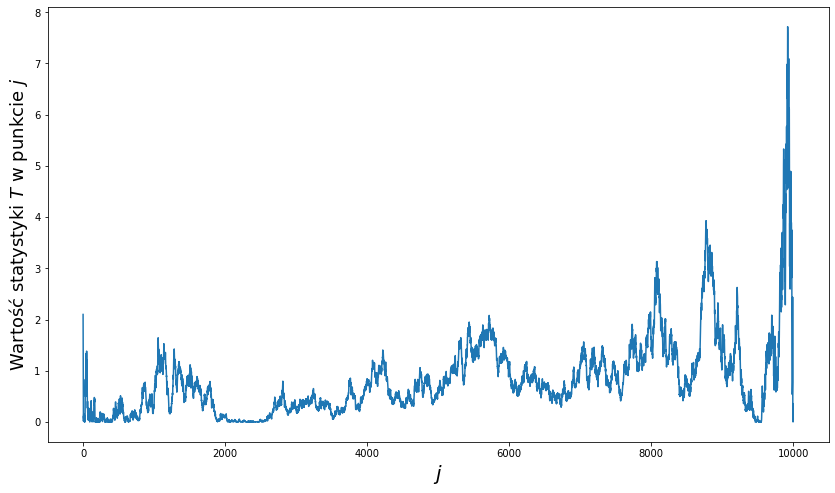

In [104]:
fig = plt.figure(figsize=(14,8))
plt.plot(BS1(Y, True))
plt.xlabel('$j$', fontsize=20)
plt.ylabel('Wartość statystyki $T$ w punkcie $j$', fontsize=18)
plt.show()
fig.savefig('figures/p4-1_4.jpg', dpi=200)

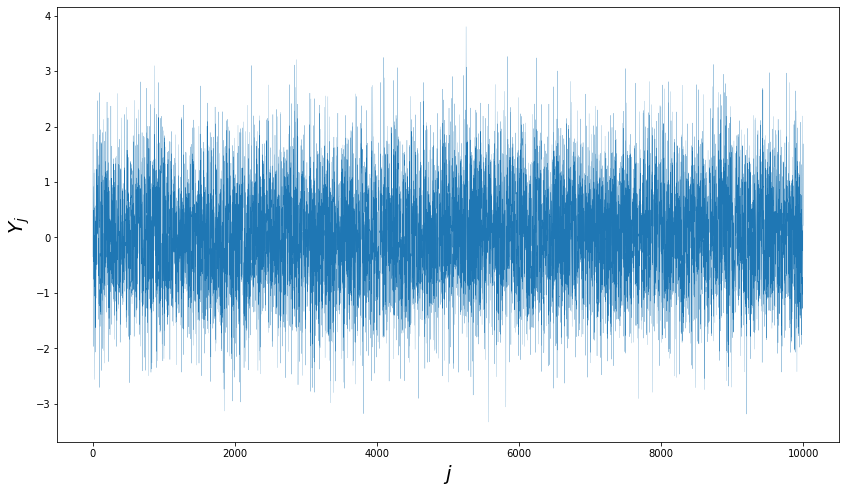

In [107]:
Y1 = sp.norm.rvs(0, 1, 5000)
Y2 = sp.norm.rvs(0.1, 1, 5000)
Y = np.hstack((Y1, Y2))

fig = plt.figure(figsize=(14,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$j$', fontsize=20)
plt.ylabel('$Y_j$', fontsize=20)
plt.show()
fig.savefig('figures/p4-1_5.jpg', dpi=200)

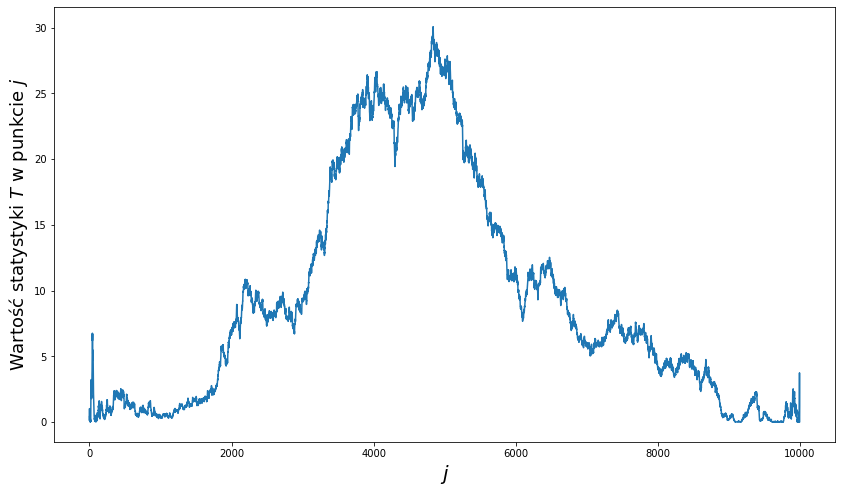

In [108]:
fig = plt.figure(figsize=(14,8))
plt.plot(BS1(Y, True))
plt.xlabel('$j$', fontsize=20)
plt.ylabel('Wartość statystyki $T$ w punkcie $j$', fontsize=18)
plt.show()
fig.savefig('figures/p4-1_6.jpg', dpi=200)

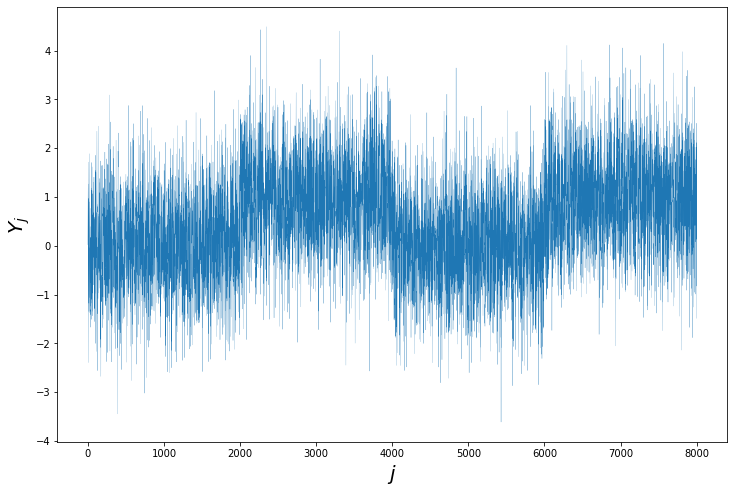

In [87]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(1, 1, 2000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y4 = sp.norm.rvs(1, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

fig = plt.figure(figsize=(12,8))
plt.plot(Y, lw=0.2)
plt.xlabel('$j$', fontsize=20)
plt.ylabel('$Y_j$', fontsize=20)
plt.show()
fig.savefig('figures/p4-3_1.jpg', dpi=200)

[2000, 4016, 5985]


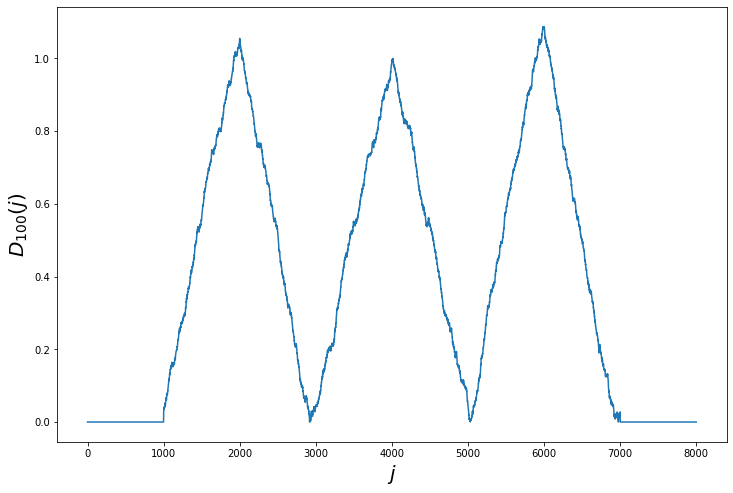

In [88]:
Y1 = sp.norm.rvs(0, 1, 2000)
Y2 = sp.norm.rvs(1, 1, 2000)
Y3 = sp.norm.rvs(0, 1, 2000)
Y4 = sp.norm.rvs(1, 1, 2000)
Y = np.hstack((Y1, Y2, Y3, Y4))

fig = plt.figure(figsize=(12,8))
plt.plot(SaRa(Y, 1000, 0.6))
plt.xlabel('$j$', fontsize=20)
plt.ylabel('$D_{100}(j)$', fontsize=20)
plt.show()
fig.savefig('figures/p4-3_2.jpg', dpi=200)